<a href="https://colab.research.google.com/github/jeffvun/Bio-Informatics-Exercises/blob/main/Practice_IV.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Practice 4: Multiclass Classification using Logistic Regression**

### **Loading Dataset**

In [26]:
fetal_health <- read.csv("Data/Fetal Health Dataset.csv")

In [27]:
sprintf("The dataset has %s records with a total of %s variables", nrow(fetal_health), ncol(fetal_health))

[1] "The dataset has 2126 records with a total of 22 variables"

### **Sampling Dataset**

Extracting 10% of the total dataset: This for demonstrating how classification is done. But ordinarily
the entire dataset should be used when using high computing devices.

In [28]:
fd_sub <-fetal_health[sample(1:nrow(fetal_health), 0.1*(2126), replace = FALSE ), ]

To understand the new dataset

In [29]:
sprintf("The dataset has %s records with a total of %s variables", nrow(fd_sub), ncol(fd_sub))

[1] "The dataset has 212 records with a total of 22 variables"

In [30]:
tab1 <- prop.table(table(fd_sub$fetal_health))

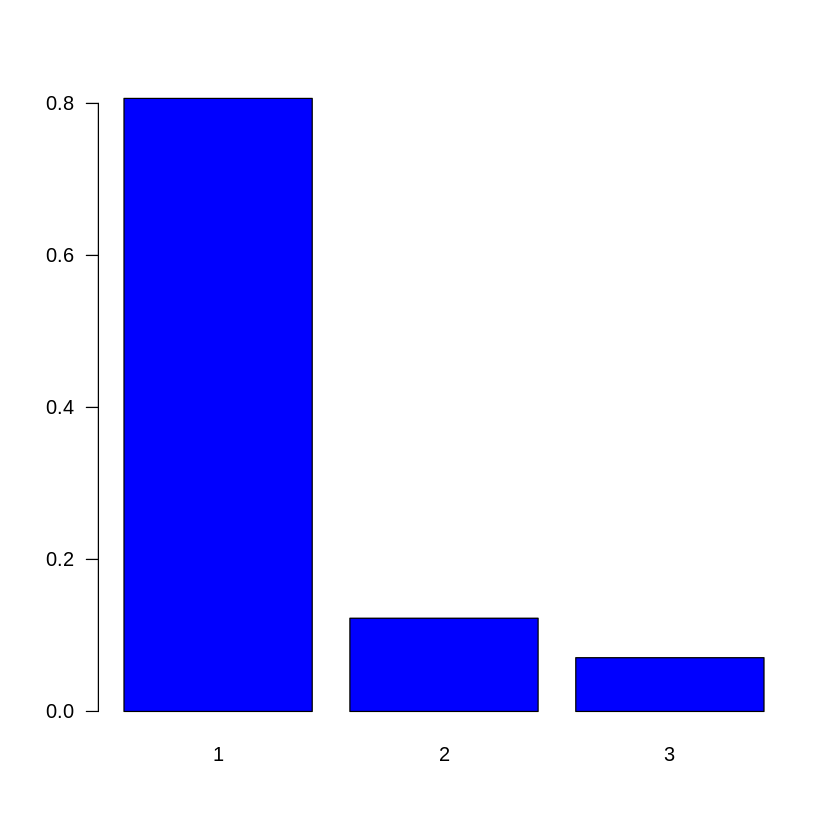

In [31]:
barplot (tab1, las=1, col="Blue")

### **Modelling**

The objective is to model say:
P(fetal_health)=f(acceleration, light_acceleartion, severe_acceleration,
prolongued_accelation)
We can view/explore the data on fetal_health using the table function as
follow:

In [32]:
table(fd_sub$fetal_health)


  1   2   3 
171  26  15 

The table shows the number of fetals that were grouped in the three classes.
We can explore for each of the variables used in the model to have a clear
impression of how the grouping occurs e.g.

In [33]:
table(fd_sub$accelerations)


    0 0.001 0.002 0.003 0.004 0.005 0.006 0.007 0.008 0.009  0.01 0.011 0.012 
   68    16    21    19    15    14    11    10     9    10     6     1     2 
0.013 0.014 0.015 0.016 0.017 0.018 
    3     2     2     1     1     1 

### **Clustering**

Next, we need to investigate if we can use the proposed model to class the
data into the three classes. This requires fitting the data into the model using
the nnet package. We therefore start by first installing the nnet package. i.e.

In [34]:
install.packages("nnet")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [35]:
library(nnet)

The model to be used is as follows:

In [36]:
formula <- fd_sub$fetal_health ~"fd_sub$accelerations + fd_sub$light_decelerations + fd_sub$severe_decelerations + fd_sub$prolongued_decelerations"

In [37]:
test <- multinom(fd_sub$fetal_health ~ fd_sub$accelerations + fd_sub$light_decelerations + fd_sub$severe_decelerations + fd_sub$prolongued_decelerations)

# weights:  18 (10 variable)
initial  value 232.905805 
iter  10 value 128.349146
iter  20 value 86.750684
iter  30 value 86.320629
iter  40 value 81.936589
iter  50 value 81.814172
iter  60 value 77.561907
iter  70 value 77.527667
iter  80 value 75.960165
iter  90 value 75.764516
iter 100 value 74.738692
final  value 74.738692 
stopped after 100 iterations


NB: The model could not converge after 100 iterations. But this could be
improved through use of more data or scaling of the data. Remember we
randomly selected variables included in the model.

We now proceed to obtain the summary statistics of our model as follows:

In [38]:
output <- summary(test)
print(output)

Call:
multinom(formula = fd_sub$fetal_health ~ fd_sub$accelerations + 
    fd_sub$light_decelerations + fd_sub$severe_decelerations + 
    fd_sub$prolongued_decelerations)

Coefficients:
   (Intercept) fd_sub$accelerations fd_sub$light_decelerations
2  0.004563541           -1049.6889                 -451.22666
3 -1.564364383            -813.4547                  -84.85892
  fd_sub$severe_decelerations fd_sub$prolongued_decelerations
2                           0                       -88.58157
3                           0                      1236.43847

Std. Errors:
  (Intercept) fd_sub$accelerations fd_sub$light_decelerations
2   0.3027863             276.7412                   189.7722
3   0.4811725             326.6103                   105.2384
  fd_sub$severe_decelerations fd_sub$prolongued_decelerations
2                2.042666e-13                        863.2831
3                0.000000e+00                        345.4400

Residual Deviance: 149.4774 
AIC: 165.4774 


From the above summary statistics we have our logistic model written as follows:

𝑙𝑜𝑔 (𝑃 (
𝑓𝑒𝑡𝑎𝑙_ℎ𝑒𝑎𝑙𝑡ℎ = 2 /
𝑓𝑒𝑡𝑎𝑙_ℎ𝑒𝑎𝑙𝑡ℎ = 1
)) = ...

we can write the expression as: log(P(Pclass=2)P(Pclass=1))=−1.5642365−0.0698696⋅Sexmale+2.004449⋅EmbarkedQ+1.876297⋅EmbarkedS−0.07211907⋅SibSp+0.04548861⋅Parch

We can obtain the estimated probability for each class as:

In [39]:
p_hat <- fitted(test)

In [40]:
head(round(p_hat, digits = 2))

,1,2,3
1,0.45,0.45,0.09
2,0.99,0.01,0.00
3,0.45,0.45,0.09
4,1.00,0.00,0.00
5,0.86,0.04,0.10
6,0.67,0.04,0.29


NB: The output using the head function only displays for the first 6 rows of the data frame.
We can use the model to predict the fetal_health class for given different values the acceleration,
light_decceleration, severe_deccelerations and prolongued_decceleration as follows:

In [41]:
newdata <- data.frame(accelerations=0.008, light_decelerations=fd_sub$light_decelerations, severe_decelerations=fd_sub$severe_decelerations, prolongued_decelerations=fd_sub$prolongued_decelerations)

In [42]:
predict(test, newdata = newdata, "probs")

,1,2,3
1,0.4517130,4.537791e-01,9.450783e-02
2,0.9912154,5.233348e-03,3.551230e-03
3,0.4517130,4.537791e-01,9.450783e-02
4,0.9982428,9.081561e-05,1.666338e-03
5,0.8634143,3.685059e-02,9.973512e-02
6,0.6692053,4.104680e-02,2.897479e-01
7,0.8589497,1.057308e-01,3.531955e-02
8,0.4517130,4.537791e-01,9.450783e-02
9,0.8589497,1.057308e-01,3.531955e-02
10,0.9912154,5.233348e-03,3.551230e-03


Based on the predicted newdata values, we can use the model to classify them to the classes as follows

In [43]:
predict(test,newdata = newdata, type = "class")

[1] 2 1 2 1 1 1 1 2 1 1 2 2 2 2 1 1 1 1 1 1 2 1 3 1 1 1 1 1 1 1 1 1 2 1 2 1 2
 [38] 1 1 1 1 1 2 1 1 1 1 1 3 2 1 3 2 1 1 1 2 1 1 1 1 1 1 1 1 2 1 1 1 2 1 1 1 1
 [75] 1 1 1 2 1 1 1 1 2 3 3 3 2 1 1 1 2 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
[112] 1 1 1 1 1 1 2 2 1 1 2 1 1 1 1 1 2 1 1 1 2 1 2 1 1 1 1 1 1 1 2 1 1 2 1 2 1
[149] 1 2 1 1 1 1 2 1 2 1 1 1 1 1 1 1 1 1 3 1 2 1 2 1 1 1 1 1 2 1 1 1 1 2 1 1 1
[186] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 1 1 1 1
Levels: 1 2 3

What the data shows, is that, all the newdata values, they are classified in class 1.
We can check on the performance of the model by running the confusion matrix as follows:

In [44]:
confmatrix<-table(predict=predict(test, type = "class"),True=fd_sub$fetal_health)

In [45]:
confmatrix

       True
predict   1   2   3
      1 155   8   2
      2  16  18   6
      3   0   0   7

### **Exercices**

1. Comment on the performance of the model.
2. Calculate the accuracy, the sensitivity and the precision of the model

The model is built on a subset of the dataset, containing 212 records with 22 variables.
The dataset is imbalanced, with 169 records in class 1, 29 records in class 2, and 14 records in class 3.
The logistic regression model was built using the multinom function from the nnet package.
The model does not seem to perform well based on the following observations:


To calculate accuracy, sensitivity, and precision, we need a confusion matrix, which was partially shown in the output as confmatrix. From the provided confusion matrix, we can calculate these performance metrics.

Accuracy is the proportion of correct predictions out of all predictions:

    Accuracy = (TP + TN) / (TP + TN + FP + FN)

Sensitivity (also known as recall or true positive rate) measures the model's ability to correctly identify positive instances:

    Sensitivity = TP / (TP + FN)

Precision measures the model's ability to correctly classify positive predictions:

    Precision = TP / (TP + FP)

In [47]:
# Load the caret package
install.packages("caret")
library(caret)


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [53]:
# Calculate accuracy
accuracy <- sum(diag(confmatrix)) / sum(confmatrix)
cat("Accuracy:", accuracy, "\n")

# Calculate sensitivity (recall) for each class
sensitivity <- diag(confmatrix) / rowSums(confmatrix)
cat("Sensitivity (Class 1):", sensitivity[1], "\n")
cat("Sensitivity (Class 2):", sensitivity[2], "\n")
cat("Sensitivity (Class 3):", sensitivity[3], "\n")

# Calculate precision for each class
precision <- diag(confmatrix) / colSums(confmatrix)
cat("Precision (Class 1):", precision[1], "\n")
cat("Precision (Class 2):", precision[2], "\n")
cat("Precision (Class 3):", precision[3], "\n")

Accuracy: 0.8490566 
Sensitivity (Class 1): 0.9393939 
Sensitivity (Class 2): 0.45 
Sensitivity (Class 3): 1 
Precision (Class 1): 0.9064327 
Precision (Class 2): 0.6923077 
Precision (Class 3): 0.4666667 


In [58]:
confusionMatrix(confmatrix)

Confusion Matrix and Statistics

       True
predict   1   2   3
      1 155   8   2
      2  16  18   6
      3   0   0   7

Overall Statistics
                                          
               Accuracy : 0.8491          
                 95% CI : (0.7936, 0.8944)
    No Information Rate : 0.8066          
    P-Value [Acc > NIR] : 0.06652         
                                          
                  Kappa : 0.5647          
                                          
 Mcnemar's Test P-Value : 0.01367         

Statistics by Class:

                     Class: 1 Class: 2 Class: 3
Sensitivity            0.9064  0.69231  0.46667
Specificity            0.7561  0.88172  1.00000
Pos Pred Value         0.9394  0.45000  1.00000
Neg Pred Value         0.6596  0.95349  0.96098
Prevalence             0.8066  0.12264  0.07075
Detection Rate         0.7311  0.08491  0.03302
Detection Prevalence   0.7783  0.18868  0.03302
Balanced Accuracy      0.8313  0.78701  0.73333